In [4]:
# %pip install ipympl
%pip install -U -e /Users/oscar/LB/imageviewer

Obtaining file:///Users/oscar/LB/imageviewer
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for imageviewer (pyproject.toml) ... done
  Created wheel for imageviewer: filename=imageviewer-0.6.1-0.editable-py3-none-any.whl size=4351 sha256=f7ce6455e53dd8928acc9ff66dd6d5cc2d197c0c951a8209b2e46e05609e56d6
  Stored in directory: /private/var/folders/lp/gmwtz0k15l9131lfg2fd97bh0000gn/T/pip-ephem-wheel-cache-y9399cm6/wheels/cf/ba/3a/80024520cc37b5667fe141f5b01a7e47b97286124514acadcc
Successfully built imageviewer
  Attempting uninstall: imageviewer
    Found existing installation: imageviewer 0.6.1
    Uninstalling imageviewer-0.6.1:
      Successfully uninstalled imageviewer-0.6.1

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to r

In [1]:
%matplotlib widget
import imageviewer as imgvw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
print(imgvw.__version__)

0.6.1


In [2]:
path = "/Users/oscar/LB/grav_lens/Proposals/"

iv = imgvw.image_viewer(directory=path,
                        folder_list=['284'])

Current working directory: /Users/oscar/LB/imageviewer/examples
Image directory defined: /Users/oscar/LB/grav_lens/Proposals/
Total number of images found:  10


Removing sky background...
- Sky background mean: 1.1275374; Sky background std: 2.1521628
Initial number of star coordinates looked at: 428
Sky area observed in RA, DEC (deg):  [np.float64(132.6721996639569), np.float64(132.93648643359896)] [np.float64(11.557333169427933), np.float64(11.938459850837043)]
Found 1209 stars catalogued in Simbad in the field


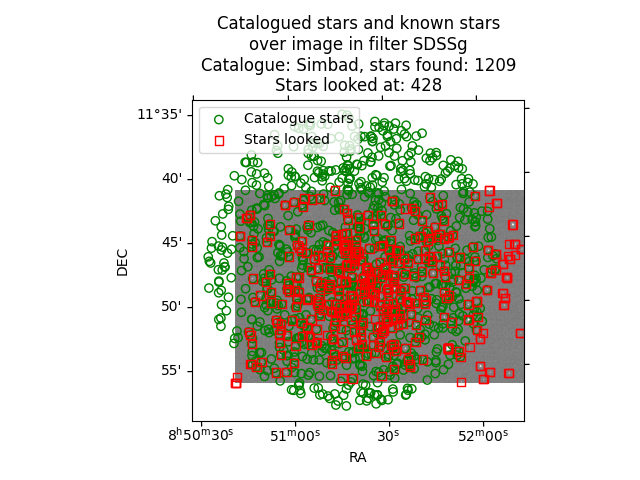


---------------------------------------------------

Photometry of image /Users/oscar/LB/grav_lens/Proposals/284/TTT2_QHY600-4_2026-02-11-23-28-46-105660_M67_SDSSg.fits
Error map average value: 2.925026
FWHM: 4.24 px
PSF shape:  (13, 13)
Found stars by photometry:  428
Good photometry stars: 411


In [3]:
imgvw.photo_analysis(iv.df_files['path'].iloc[0], plot=True,
                     init_table = './test_table.pkl',
                     sky_background={'sigma': 3, 'maxiters': 5, 'sky_threshold': 3},
                     catalogue = 'Simbad')

Removing sky background...
- Sky background mean: 25.961061; Sky background std: 5.1668277
No initial table provided. Will perform source detection on the image.
FWHM used for source detection: 4.770677223962908 pixels
No initial table provided. Using find_peaks for source detection.
- find_peaks threshold: 1033.3655
Detecting sources...
- Sources found by find_peaks: 426


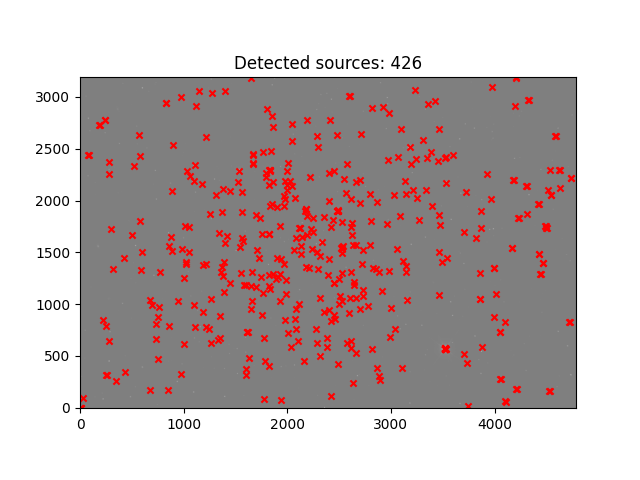

In [4]:
i_table = pd.read_pickle('./test_table.pkl')
table = imgvw.detect_sources(iv.df_files['path'].iloc[-1], plot=True,
                                sky_threshold = 200,
                                add_sources=False,
                                method = 'find_peaks',
                            #    init_table=i_table,
                                )

In [17]:
np.where([x in [2,4,5,6,7,8,9,10] for x in list(table['x'])])

(array([0, 1, 2]),)

In [18]:
table

x,y
int64,int64
2,0
6,0
8,0
3742,17
4109,60
4106,61
1944,75
1775,85
26,94


In [15]:
plt.close()
table.to_pandas().to_pickle('./test_table.pkl')

------
Viewing multiple images:
284/TTT2_QHY600-4_2026-02-11-23-28-46-105660_M67_SDSSg.fits
    Object:  M67   -  Filter:  SDSSg
284/TTT2_QHY600-4_2026-02-11-23-28-48-587673_M67_SDSSg.fits
    Object:  M67   -  Filter:  SDSSg
284/TTT2_QHY600-4_2026-02-11-23-28-56-576455_M67_SDSSg.fits
    Object:  M67   -  Filter:  SDSSg
284/TTT2_QHY600-4_2026-02-11-23-29-09-384584_M67_SDSSg.fits
    Object:  M67   -  Filter:  SDSSg
284/TTT2_QHY600-4_2026-02-11-23-29-32-219505_M67_SDSSg.fits
    Object:  M67   -  Filter:  SDSSg


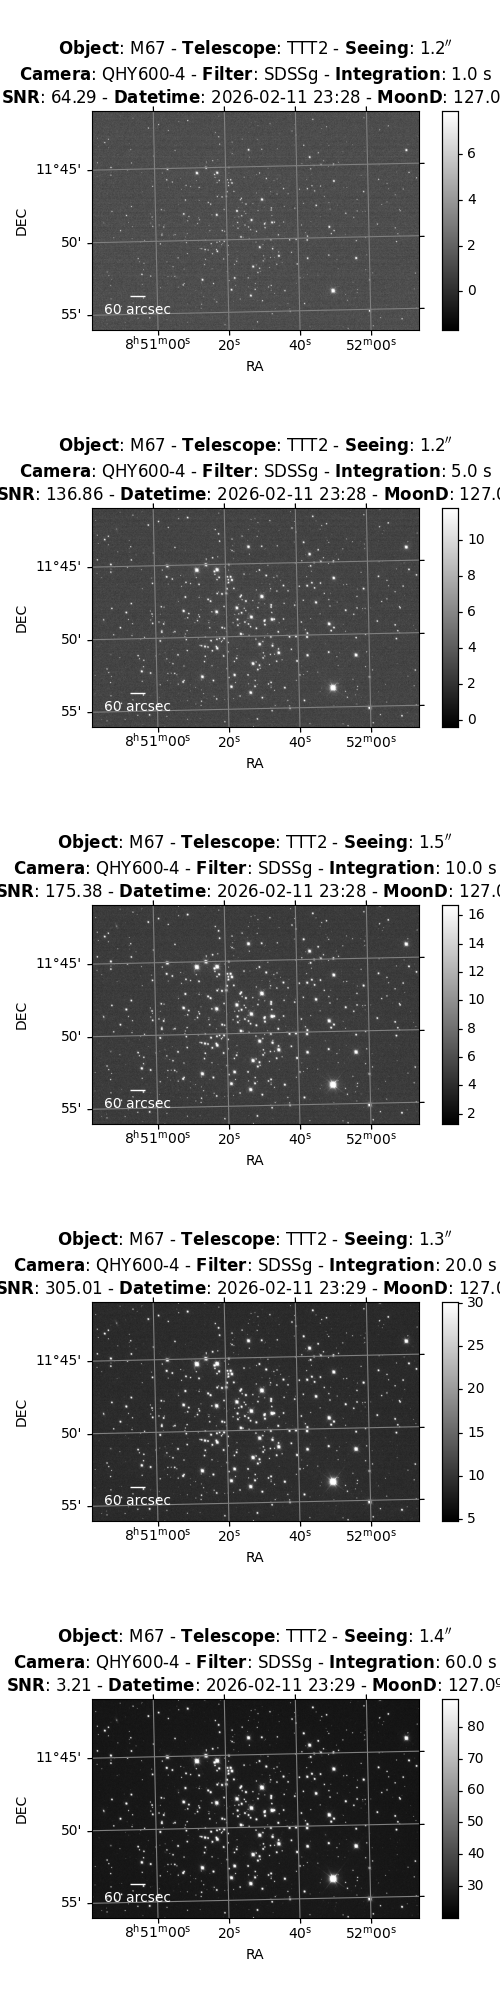

In [8]:
# iv.header_info(-1, iloc=True, interesting_keys='all', )

iv.view_image([0,1,2,3,4], iloc=True,
              nrows_ncols=(5,1), figsize=(5,20),
              manipulation_kw={
                  'rotate': False,
                  'percentile': (10, 99),
                  #'zoom': '0 10 0d',
              },
              plotting_kw={
                  'scalebar_arcsec': 60,
                  })

In [11]:


iv.dataframe_add(['seeing', 'moon', 'integration', 'ZP', 'EZP', 'SCALE', 'FWHM'])
iv.df_files


,filename,path,telescope,camera,object,filter,size_MB,date_time,date,folder_found,im_type,seeing,moon,integration,EZP,ZP,SCALE,FWHM
0,TTT2_QHY600-4_2026-02-11-23-28-46-105660_M67_S...,/Users/oscar/LB/grav_lens/Proposals/284/TTT2_Q...,TTT2,QHY600-4,M67,SDSSg,61.15968,2026-02-11 23:28:46.105660,2026-02-11,284,LB,1.198911,126.979272,1.0,0.0074,23.1143,0.283,4.236433
1,TTT2_QHY600-4_2026-02-11-23-28-48-587673_M67_S...,/Users/oscar/LB/grav_lens/Proposals/284/TTT2_Q...,TTT2,QHY600-4,M67,SDSSg,61.15968,2026-02-11 23:28:48.587673,2026-02-11,284,LB,1.248772,126.979607,5.0,0.0089,23.1340,0.283,4.412621
2,TTT2_QHY600-4_2026-02-11-23-28-56-576455_M67_S...,/Users/oscar/LB/grav_lens/Proposals/284/TTT2_Q...,TTT2,QHY600-4,M67,SDSSg,61.15968,2026-02-11 23:28:56.576455,2026-02-11,284,LB,1.478807,126.981035,10.0,0.0163,23.1276,0.283,5.225466
3,TTT2_QHY600-4_2026-02-11-23-29-09-384584_M67_S...,/Users/oscar/LB/grav_lens/Proposals/284/TTT2_Q...,TTT2,QHY600-4,M67,SDSSg,61.15968,2026-02-11 23:29:09.384584,2026-02-11,284,LB,1.296835,126.983271,20.0,0.0130,23.1637,0.283,4.582455
4,TTT2_QHY600-4_2026-02-11-23-29-32-219505_M67_S...,/Users/oscar/LB/grav_lens/Proposals/284/TTT2_Q...,TTT2,QHY600-4,M67,SDSSg,61.15968,2026-02-11 23:29:32.219505,2026-02-11,284,LB,1.429394,126.987340,60.0,0.0020,23.1178,0.283,5.050861
5,TTT2_QHY600-4_2026-02-11-23-30-36-425202_M67_S...,/Users/oscar/LB/grav_lens/Proposals/284/TTT2_Q...,TTT2,QHY600-4,M67,SDSSr,61.15968,2026-02-11 23:30:36.425202,2026-02-11,284,LB,7.508766,126.998739,1.0,0.0957,22.8894,0.283,26.532743
6,TTT2_QHY600-4_2026-02-11-23-30-38-927412_M67_S...,/Users/oscar/LB/grav_lens/Proposals/284/TTT2_Q...,TTT2,QHY600-4,M67,SDSSr,61.15968,2026-02-11 23:30:38.927412,2026-02-11,284,LB,1.089914,126.999182,5.0,0.0163,22.4183,0.283,3.851286
7,TTT2_QHY600-4_2026-02-11-23-30-46-716101_M67_S...,/Users/oscar/LB/grav_lens/Proposals/284/TTT2_Q...,TTT2,QHY600-4,M67,SDSSr,61.15968,2026-02-11 23:30:46.716101,2026-02-11,284,LB,1.313581,127.000569,10.0,0.0156,22.3422,0.283,4.641630
8,TTT2_QHY600-4_2026-02-11-23-30-59-526358_M67_S...,/Users/oscar/LB/grav_lens/Proposals/284/TTT2_Q...,TTT2,QHY600-4,M67,SDSSr,61.15968,2026-02-11 23:30:59.526358,2026-02-11,284,LB,1.482317,127.002872,20.0,0.0066,22.3781,0.283,5.237870
9,TTT2_QHY600-4_2026-02-11-23-31-22-358115_M67_S...,/Users/oscar/LB/grav_lens/Proposals/284/TTT2_Q...,TTT2,QHY600-4,M67,SDSSr,61.15968,2026-02-11 23:31:22.358115,2026-02-11,284,LB,1.350102,127.006944,60.0,0.0147,22.4698,0.283,4.770677


# Tests for interactive plotting

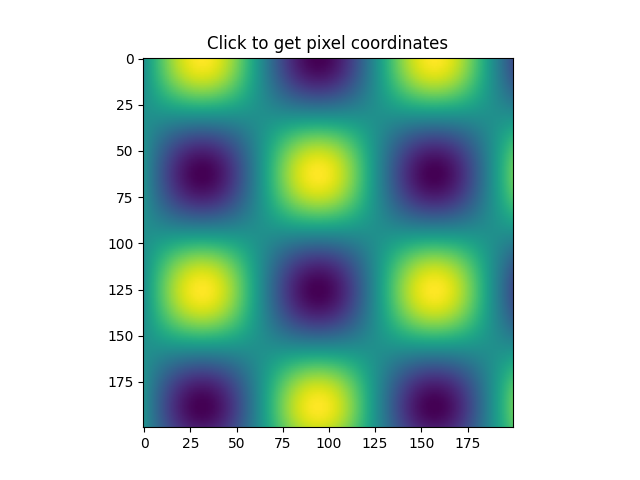

ValueError: Mismatch between number of vals and columns

In [20]:
def interactive(image):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.set_title('Click to get pixel coordinates')
    coords = []
    coords = Table()
    coords['x'] = [10,20,30]
    coords['y'] = [10,20,30]
    coords['flux'] = [100,200,300]
    def onclick(event):
        if event.inaxes != ax or event.xdata is None or event.ydata is None:
            return
        x, y = event.xdata, event.ydata
        # coords.append((x, y))
        coords.add_row([x, y])  # Add row with x, y, and flux (default 0)
        ax.plot(x, y, 'bx', markersize=10)
        fig.canvas.draw_idle()

    fig.canvas.mpl_connect('button_press_event', onclick)

    return coords

XX, YY = np.meshgrid(np.arange(200), np.arange(200))
Z = np.sin(XX/20) * np.cos(YY/20)
coords = interactive(Z)

In [4]:
iv.header_info(-1, iloc=True, interesting_keys='GAIN', )

Image: 284/TTT2_QHY600-4_2026-02-11-23-31-22-358115_M67_SDSSr.fits

   --- HEADER DATA ---
GAIN  =  0.44   ---   [e/ADU] Gain


In [12]:
import pandas as pd
i_table = pd.read_pickle('./test_table.pkl')
colnames = i_table.columns.to_list()
colnames == ['x', 'y']

True